## ĐỒ ÁN CUỐI KỲ 

## Lập trình cho Khoa học dữ liệu - CQ2022/21

Nhóm thực hiện
<table>
    <tr>
        <th style="text-align: center;">Họ và tên</th>
        <th style="text-align: center;">MSSV</th>
    </tr>
        <td>Phan Bá Đức</td>
        <td>22120071</td>
    <tr>
    </tr>
        <td>Đặng Duy Lân</td>
        <td>22120182</td>
    <tr>
    </tr>
        <td>Nguyễn Nhật Long</td>
        <td>22120194</td>
    <tr>
</table>

**GVHD: ThS. Phạm Trọng Nghĩa**

---

# Nguồn dữ liệu

Dữ liệu mà tụi em sử dụng được lấy từ [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) ở trên Kaggle. 

Theo Tổ chức Y tế Thế giới (WHO), đột quỵ luôn nằm trong top các nguyên nhân gây tử vong nhiều nhất trên toàn thế giới ([nguồn](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death)). Dataset này được tác giả sử dụng để dự đoán xem một bệnh nhân liệu có bị đột quỵ hay không dựa trên các thông tin như tuổi, giới tính, các loại bệnh, tình trạng hút thuốc,...

Đối với dataset này, tác giả đã không cung cấp nguồn của dữ liệu cũng như cách mà tác giả thu thập các dữ liệu này.

Ngoài ra, tác giả cũng đã cấp phép cho phép sử dụng dataset này vào mục đích giáo dục.

<center>
<image src=img/src.png>
</center>

# Khám phá và tiền xử lý dữ liệu

## Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Các cột có ý nghĩa gì?

Mỗi cột là một đặc trưng tượng trưng cho chỉ số của 1 bệnh nhân, cụ thể như sau:

1) `id`: số định danh, mỗi người có một số khác nhau.

2) `gender`: giới tính, thuộc 1 trong 3 giá trị: "Male", "Female" hoặc "Other".

3) `age`: tuổi của bệnh nhân.

4) `hypertension`: tình trạng cao huyết áp của bệnh nhân, 1 nếu bệnh nhân bị cao huyết áp, 0 nếu ngược lại.

5) `heart_disease`: tình trạng bệnh tim của bệnh nhân, 1 nếu bệnh nhân bị bệnh tim, 0 nếu ngược lại.

6) `ever_married`: liệu bệnh nhân đã từng kết hôn hay chưa, "Yes" nếu đã từng kết hôn, "No" nếu ngược lại.

7) `work_type`: tình trạng công việc, cụ thể

    - "Children": trẻ em, chưa tham gia vào lao động.
    
    - "Govt_job": công việc trong các cơ quan chính phủ.
    
    - "Never_worked": chưa từng làm việc.

    - "Private": công việc trong các công ty, doanh nghiệp tư nhân hoặc các tổ chức phi chính phủ.

    - "Self-employed": lao động tự do.

8) `Residence_type`: nơi cư trú, "Rural" nếu ở nông thôn, "Urban" nếu ở thành thị.

9) `avg_glucose_level`: mức đường huyết trung bình.

10) `bmi`: chỉ số BMI.

11) `smoking_status`: tình trạng hút thuốc của bệnh nhân, cụ thể:

    - "formerly smoked": đã từng hút thuốc, đã bỏ. 

    - "never smoked": chưa bao giờ hút thuốc.

    - "smokes": hiện tại vẫn hút thuốc.  
    
    - "Unknown": không có thông tin.

12) `stroke`: liệu bệnh nhân có bị đột quỵ không, 1 là có, ngược lại là 0.

## Các cột có kiểu dữ liệu như thế nào? Có cột nào có kiểu không phù hợp không?

In [3]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Có vẻ như kiểu dữ liệu của các cột đã khá hợp lý, tuy nhiên có cột `id` tuy là giá trị số nguyên nhưng giá trị của nó không có ý nghĩa về độ lớn, do đó em sẽ chuyển sang kiểu category.

In [4]:
df['id'] = df['id'].astype('category')
df.dtypes

id                   category
gender                 object
age                   float64
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
dtype: object

# Các câu hỏi có thể trả lời từ dataset

## Câu 1:

## Câu 2:

## Câu 3: Liệu rằng có sự khác nhau giữa nguy cơ bị đột quỵ giữa nam giới và nữ giới hay không?

Trả lời câu hỏi này sẽ giúp chúng ta tìm hiểu rõ liệu nam giới hay nữ giới có nguy cơ cao hơn giúp tăng cường nhận thức cộng đồng về tầm quan trọng của việc phòng ngừa đột quỵ. Nếu một giới tính cụ thể được xác định là có nguy cơ cao hơn, chúng ta có thể tạo ra các chiến lược giáo dục đặc biệt để nhắm vào nhóm này, nhấn mạnh sự cần thiết của việc kiểm tra sức khỏe định kỳ và thay đổi lối sống. Còn nếu không thể kết luận rằng một giới tính nào là có nguy cơ bị đột quỵ cao hơn, điều đó nghĩa là đột quỵ có thể xảy ra với bất kỳ ai, không kể giới tính thì ta có thể tập trung vào những nhóm có yếu tố nguy cơ cao như người mắc bệnh tim, bệnh tiểu đường,...

# Tìm câu trả lời cho các câu hỏi

## Câu 1:

## Câu 2:

## Câu 3: Liệu rằng có sự khác nhau giữa nguy cơ bị đột quỵ giữa nam giới và nữ giới hay không?

Các bước trả lời câu hỏi:

- **Bước 1:** chọn ra các đặc trưng mà có khả năng sẽ ảnh hưởng tới nguy cơ bị đột quỵ dựa vào ma trận tương quan, kinh nghiệm.
- **Bước 2:** vẽ biểu đồ so sánh, phân tích.
- **Bước 3:** tính số người bị đột quỵ cho từng giới tính.
- **Bước 4:** dùng kiểm định thống kê để kiểm chứng giả thuyết, kết luận.

### Bước 1: chọn ra các đặc trưng mà có khả năng sẽ ảnh hưởng tới nguy cơ bị đột quỵ dựa vào ma trận tương quan, kinh nghiệm.

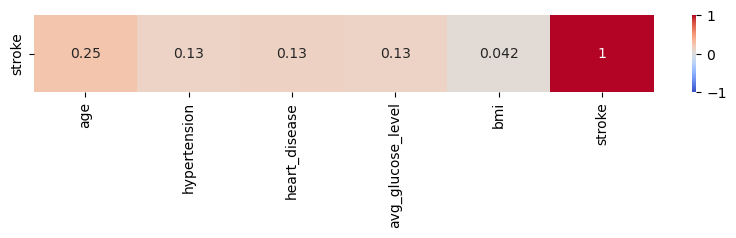

In [5]:
corr_matrix = df.corr()[['stroke']].T
plt.figure(figsize=(10, 1))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Có thể thấy các đặc trưng đều có tương quan dương, điều đó cho thấy mối quan hệ cùng chiều (nếu giá trị của một yếu tố tăng, nguy cơ đột quỵ cũng tăng). Tuy nhiên các giá trị này không quá lớn, nên việc chọn các đặc trưng không quá có giá trị, nên dựa vào kinh nghiệm của mình, nhóm sẽ chọn ra các đặc trưng sau: `age`, `hypertension`, `heart_disease`, `avg_glucose_level`.

### Bước 2: vẽ biểu đồ so sánh, phân tích.

Tìm số bệnh nhân có giới tính khác nam và nữ.

In [6]:
(df['gender'] == 'Other').sum()

1

Có thể thấy là chỉ có 1 bệnh nhân không biết giới tính, số lượng không nhiều nên nhóm sẽ bỏ qua bệnh nhân này. Tiếp theo nhóm sẽ tính số lượng nam và nữ trong dataset.

In [7]:
data = df.loc[df['gender'] != 'Other']
m_df = df[df['gender'] == 'Male']
f_df = df[df['gender'] == 'Female']

print(f'Số lượng nam giới: {len(m_df)} ({len(m_df) / (len(m_df) + len(f_df)) * 100:.3f}%)')
print(f'Số lượng nữ giới: {len(f_df)} ({len(f_df) / (len(m_df) + len(f_df)) * 100:.3f}%)')

Số lượng nam giới: 2115 (41.398%)
Số lượng nữ giới: 2994 (58.602%)


Đầu tiên, chia 4 đặc trưng đã chọn ra làm 2 nhóm:

- `age` và `avg_glucose_level`.

- `hypertension` và `heart_disease`.

Chia ra 2 nhóm bởi vì `hypertension` và `heart_disease` chỉ có giá trị 0 và 1, điều này sẽ giúp cho việc vẽ và phân tích biểu đồ dễ dàng hơn.

Vẽ boxplot và histogram cho `age` và `avg_glucose_level`.

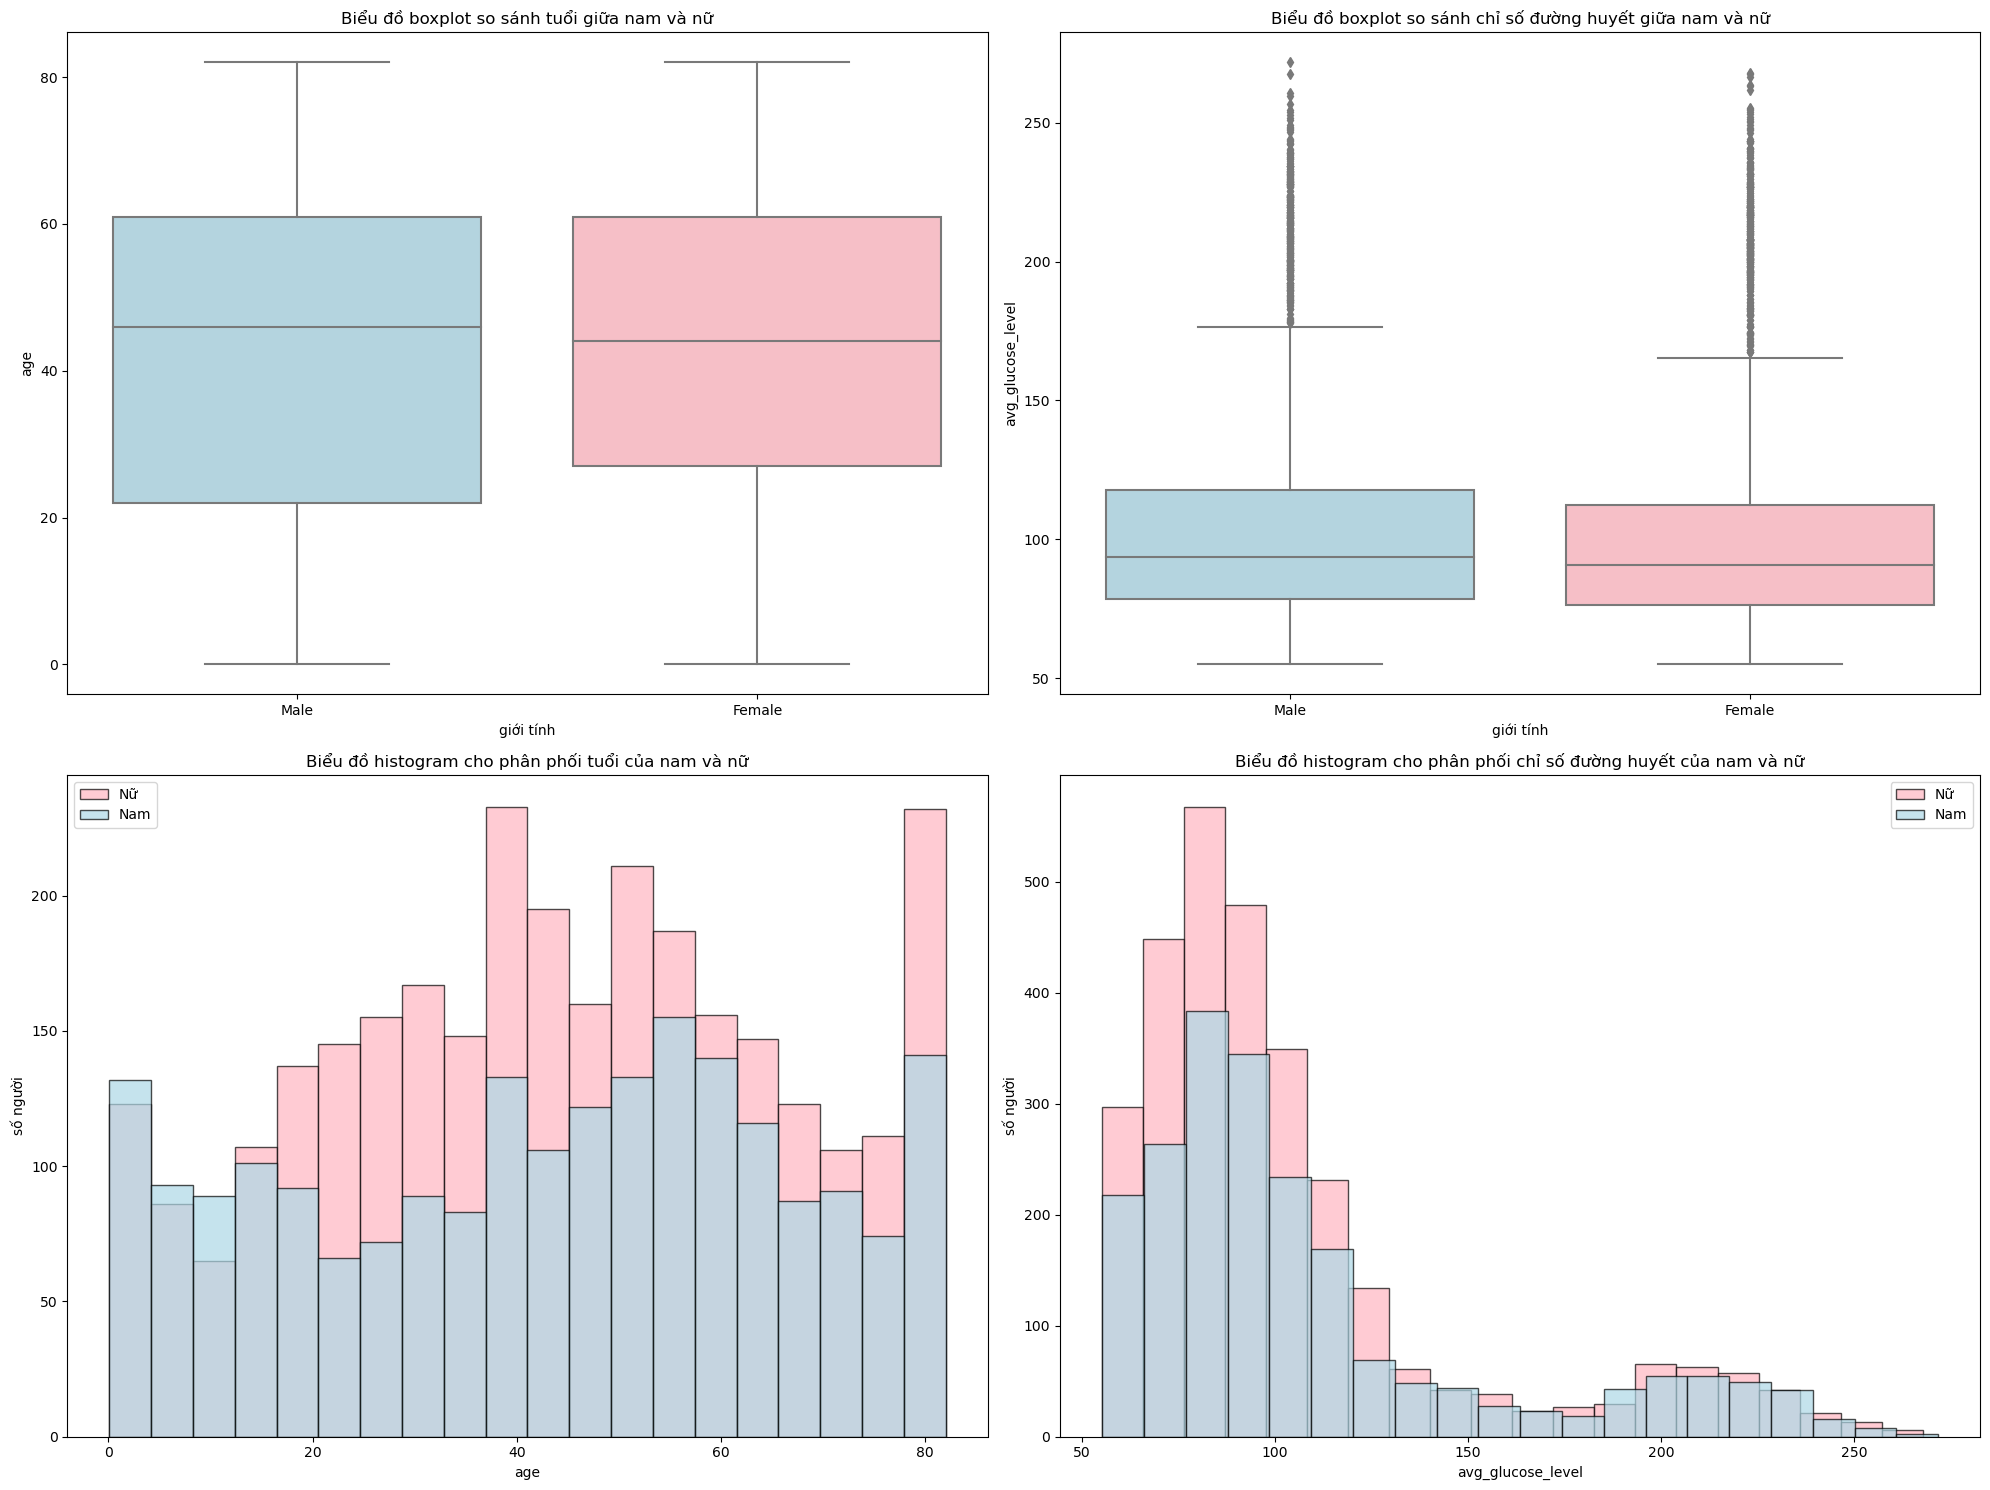

In [8]:
fetures = ['age', 'avg_glucose_level']

# chuyển tên của cột sang tiếng Việt cho biểu đồ
name = {
    'age': 'tuổi',
    'avg_glucose_level': 'chỉ số đường huyết',
}
plt.figure(figsize=(20, 15))

for i, feature in enumerate(fetures, 1):
    # vẽ boxplot cho phân bố của "feature" theo nam và nữ
    plt.subplot(2, 2, i)
    sns.boxplot(x='gender', y=feature, data=data, palette={'Male': 'lightblue', 'Female': 'lightpink'})
    plt.title(f'Biểu đồ boxplot so sánh {name[feature]} giữa nam và nữ')
    plt.xlabel('giới tính')
    plt.ylabel(feature)
    
    # vẽ histogram cho phân bố của "feature" theo nam và nữ
    plt.subplot(2, 2, i + 2)
    plt.title(f'Biểu đồ histogram cho phân phối {name[feature]} của nam và nữ')
    plt.hist(f_df[feature], bins=20, color='lightpink', edgecolor='black', alpha=0.7, label='Female')
    plt.hist(m_df[feature], bins=20, color='lightblue', edgecolor='black', alpha=0.7, label='Male')
    plt.ylabel('số người')
    plt.xlabel(feature)
    plt.legend(['Nữ', 'Nam'])

plt.tight_layout()
plt.show()

Vẽ biểu đồ cột cho các đặc trưng còn lại.

Tỷ lệ người mắc cao huyết áp của nam và nữ:
Nam: 10.496%
Nữ: 9.218%
Tỷ lệ người mắc bệnh tim của nam và nữ:
Nam: 7.707%
Nữ: 3.774%


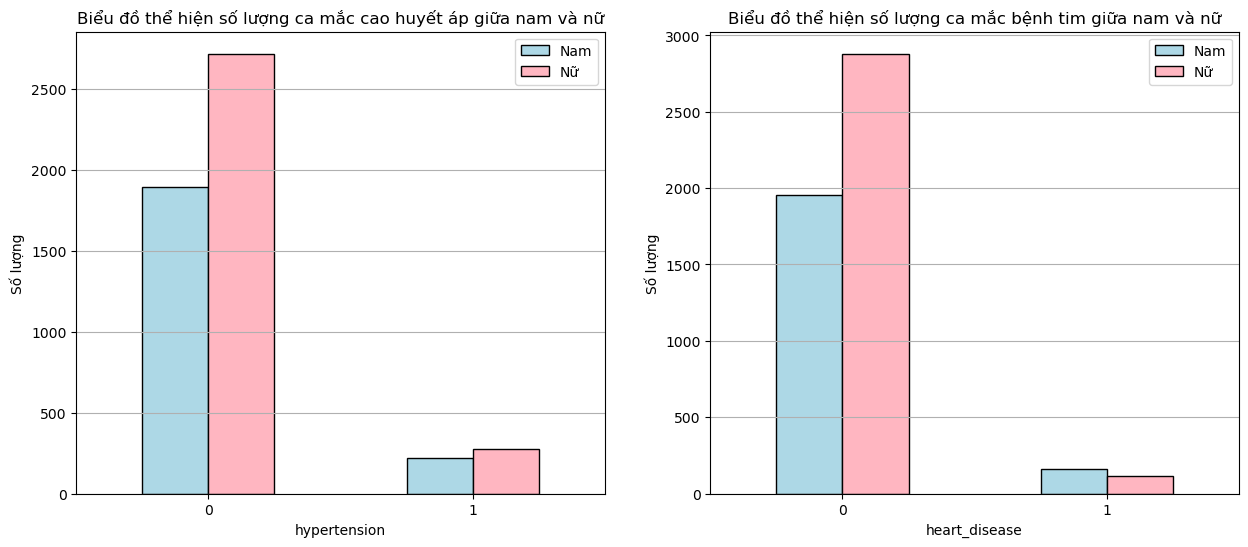

In [9]:
features = ['hypertension', 'heart_disease']

# chuyển tên của cột sang tiếng Việt cho biểu đồ
name = {
    'hypertension': 'cao huyết áp',
    'heart_disease': 'bệnh tim',
}
# tạo 2 biểu đồ theo hàng ngang
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# tính số lượng người mắc "feature", chuyển sang dataframe và trực quan
for i, feature in enumerate(features):
    m_counts = m_df[feature].value_counts().sort_index()
    f_counts = f_df[feature].value_counts().sort_index()
    
    df_plot = pd.DataFrame({'Male': m_counts, 'Female': f_counts})
    df_plot.plot(kind='bar', ax=axes[i], edgecolor='black', color=['lightblue', 'lightpink'])
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].set_title(f'Biểu đồ thể hiện số lượng ca mắc {name[feature]} giữa nam và nữ')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Số lượng')
    axes[i].yaxis.grid(True)
    axes[i].legend(['Nam', 'Nữ'])
    print(f'Tỷ lệ người mắc {name[feature]} của nam và nữ:')
    print(f'Nam: {m_counts[1] / (m_counts[0] + m_counts[1]) * 100:.3f}%')
    print(f'Nữ: {f_counts[1] / (f_counts[0] + f_counts[1]) * 100:.3f}%')


Nhận xét:

- Đối với 2 đặc trưng đầu: tuy có khác biệt về số lượng nam và nữ, nhưng hình dáng và cấu trúc trong cả 2 biểu đồ histogram là giống nhau, điều này cũng được thể hiện qua 2 biểu đồ boxplot.

- Đối với các đặc trưng còn lại: từ số liệu trên, có thể thấy tỷ lệ mắc cao huyết áp ở nam giới cao hơn nữ giới, còn đối với tỷ lệ mắc bệnh tim, nam giới cao gấp đôi nữ giới! Điều này có thể chỉ ra rằng nam giới có nguy cơ mắc cao huyết áp và bệnh tim cao hơn nữ giới. Các yếu tố như lối sống, chế độ ăn uống, mức độ căng thẳng và các thói quen xấu như hút thuốc và uống rượu,... có thể gây ra sự khác nhau này.

### Bước 3: tính số người bị đột quỵ cho từng giới tính.

Tính số người bị đột quỵ cho nam và nữ.

In [10]:
gender_df = data[['gender', 'stroke']]
male_stroke_counts = gender_df[gender_df['gender'] == 'Male']['stroke'].value_counts()
female_stroke_counts = gender_df[gender_df['gender'] == 'Female']['stroke'].value_counts()
gender_df.groupby('gender').sum().reset_index()

,gender,stroke
0,Female,141
1,Male,108


Vẽ biểu đồ thể hiện tỷ lệ người mắc đột quỵ cho nam và nữ.

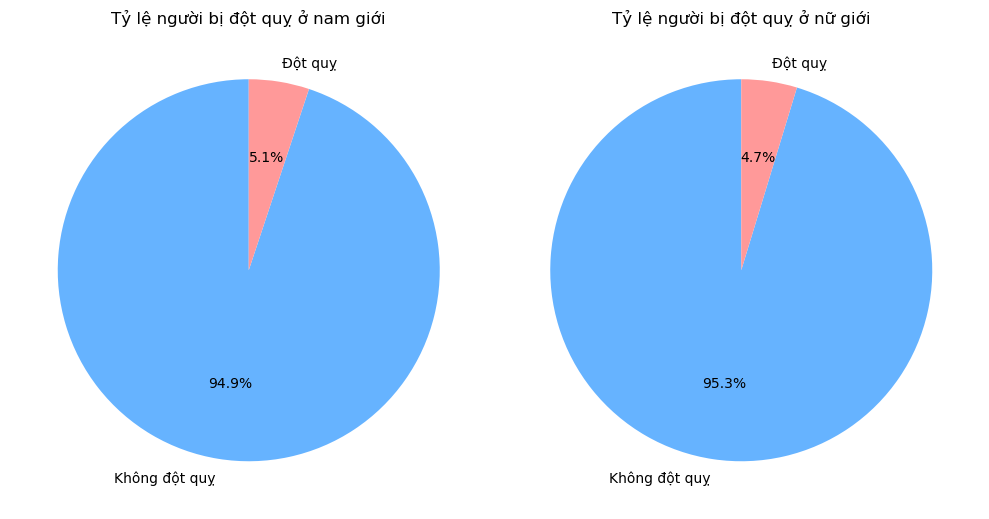

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Biểu đồ tròn cho nam
axes[0].pie(male_stroke_counts, labels=['Không đột quỵ', 'Đột quỵ'], autopct='%1.1f%%', startangle=90, colors=['#66B3FF', '#FF9999'])
axes[0].set_title('Tỷ lệ người bị đột quỵ ở nam giới')

# Biểu đồ tròn cho nữ
axes[1].pie(female_stroke_counts, labels=['Không đột quỵ', 'Đột quỵ'], autopct='%1.1f%%', startangle=90, colors=['#66B3FF', '#FF9999'])
axes[1].set_title('Tỷ lệ người bị đột quỵ ở nữ giới')

plt.tight_layout()
plt.show()

Nhận xét: có thể thấy tuy là số phụ nữ mắc đột quỵ nhiều hơn nam giới tuy nhiên tỷ lệ mắc đột quỵ của nam giới lại cao hơn.

### Bước 4: dùng kiểm định thống kê để kiểm chứng giả thuyết, kết luận.


Giả thuyết: 

- Giả thuyết không ($H_0$): không có sự khác nhau giữa tỷ lệ người mắc đột quỵ giữa nam và nữ.

- Đối thuyết ($H_1$): có sự khác nhau giữa tỷ lệ người mắc đột quỵ giữa nam và nữ.

Bây giờ nhóm sẽ kiểm định giả thuyết trên với mức ý nghĩa $\alpha = 5\%$ bằng kiểm định Chi-Square.

Đầu tiên, tạo 1 bảng tần số về số lượng nam và nữ mắc đột quỵ và không mắc đột quỵ.

In [12]:
stroke_df = gender_df.groupby('gender').sum().reset_index()
# tạo cột no stroke: số người không mắc đột quỵ
stroke_df['no stroke'] = [len(f_df) - stroke_df[stroke_df['gender'] == 'Female']['stroke'].values[0],
                          len(m_df) - stroke_df[stroke_df['gender'] == 'Male']['stroke'].values[0]]
stroke_df

,gender,stroke,no stroke
0,Female,141,2853
1,Male,108,2007


Tiếp theo nhóm sẽ đi tính $p-value$, mức ý nghĩa nhỏ nhất để có thể bác bỏ giả thuyết $H_0$.

In [13]:
# chuyển sang numpy array
observed = np.array(stroke_df.iloc[:, 1:])
chi2, p, dof, expected = stats.chi2_contingency(observed)

# Hiển thị kết quả
print(f"p-value = {p}")

p-value = 0.5598277580669415


Kết luận: Với $p-value \approx 0.56 > 0.05$, ta chưa đủ cơ sở để bác bỏ $H_0$. Vậy với mức ý nghĩa $5\%$, không có sự khác nhau về tỷ lệ người mắc đột quỵ giữa nam và nữ.

# Tổng kết

# Tài liệu tham khảo